In [121]:
from pymongo import MongoClient
import pandas as pd
import time
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gp


In [2]:
client = MongoClient("localhost:27017")

In [3]:
client.list_database_names()
db = client["Ironhack"]

In [4]:
db.list_collection_names()

['PROJECT3', 'nyneigh', 'First', 'Lab', 'nyrest']

In [7]:
companys= db.get_collection("Lab")

In [8]:
companys

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ironhack'), 'Lab')

In [9]:
result = companys.find_one()

In [10]:
df = pd.read_csv('Lab.csv')

In [154]:
data1 = pd.read_json ('Labjson.csv')

In [ ]:
data.sample(5)

In [ ]:
data.columns

In [14]:
def dropcolumn(df,column):
    df.drop(f"{column}", axis = 1, inplace = True)
    
    return df

In [15]:
columns=['permalink', 'crunchbase_url', 'homepage_url',
       'blog_url', 'blog_feed_url', 'twitter_username',
        'founded_year', 'founded_month', 'founded_day',
       'deadpooled_year', 'deadpooled_month', 'deadpooled_day',
       'deadpooled_url', 'tag_list', 'email_address', 'phone_number',
       'created_at', 'updated_at', 'image',
        'relationships', 'providerships', 'funding_rounds',
       'video_embeds', 'screenshots', 'external_links', 'partners', 'ipo','competitions','overview','_id','products','invesments']
for i in columns:
    dropcolumn(data,i)

In [34]:
dropcolumn(data,'investments')

,name,category_code,number_of_employees,description,total_money_raised,offices
22,RockYou,games_video,106.0,SOCIAL GAMING COMPANY,$136M,"[{'description': '', 'address1': '585 Broadway..."
26,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,"[{'description': 'San Francisco', 'address1': ..."
46,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,"[{'description': '', 'address1': '2 Shaw Alley..."
58,MocoSpace,games_video,25.0,LARGEST MOBILE GAMES COMMUNITY IN N AMER,$10.5M,"[{'description': '', 'address1': '', 'address2..."
61,Xfire,games_video,NaN,SOCIAL GAMING PORTAL & PLATFORM,$7M,"[{'description': 'Xfire Headquarters', 'addres..."
...,...,...,...,...,...,...
1070,Antix Labs,games_video,NaN,MULTI-SCREEN PLAYER FOR NATIVE GAMES,$3M,"[{'description': '', 'address1': '200 Brook Dr..."
1073,Shape Games,games_video,NaN,GAME DEVELOPER,$0,"[{'description': '', 'address1': '901 North Pi..."
1074,G5 Entertainment,games_video,107.0,PUBLISHER AND DEVELOPER OF MOBILE GAMES,$0,"[{'description': 'Development Office', 'addres..."
1075,FragBrag,games_video,4.0,VIDEO SHARING FOR GAMERS,$0,[]


In [16]:
data['description'] = data['description'].str.upper()

In [17]:
data['description'] = data['description'].str.extract('(.*GAM.*)')

In [19]:
data.sample(10)

,name,category_code,number_of_employees,description,total_money_raised,investments,offices
967,Boolabus,games_video,3.0,ONLINE GAMBLING PRODUCT DEVELOPMENT,$0,[],[]
514,UltiZen,games_video,NaN,ART AND GAME DEVELOPMENT,$15.5M,[],"[{'description': 'HQ', 'address1': '879 Zhong ..."
80,PlaySpan,games_video,NaN,P2P IN-GAME COMMERCE,$46.3M,[],"[{'description': 'HQ', 'address1': '', 'addres..."
898,Z2Live,games_video,130.0,MOBILE GAMES,$6.5M,[],"[{'description': 'Z2Live', 'address1': '1601 2..."
761,Mobile Digital Media,games_video,NaN,MOBILE GAME SOFTWARE DEVELOPMENT,$2M,[],[]
61,Xfire,games_video,NaN,SOCIAL GAMING PORTAL & PLATFORM,$7M,[],"[{'description': 'Xfire Headquarters', 'addres..."
805,i-Jet Media,games_video,150.0,SOCIAL GAMES DISTRIBUTION NETWORK,$0,[],"[{'description': '', 'address1': '440 N Wolfe ..."
554,Muzui,games_video,NaN,ONLINE CASUAL GAMING NETWORK,$0,[],[]
297,GameFly,games_video,NaN,VIDEO GAME RENTALS,$10.7M,[],"[{'description': 'GameFly HQ', 'address1': '11..."
782,Chillingo,games_video,NaN,VIDEO GAME PUBLISHER,$0,[],"[{'description': '', 'address1': 'Beechfield H..."


In [20]:
 data=data.dropna(subset=['description'])

In [ ]:
check=data['total_money_raised'].value_counts()
print(check.to_string())

In [21]:
 data=data.dropna(subset=['total_money_raised'])

In [49]:
data=data.explode('offices')

In [50]:
data

,name,category_code,number_of_employees,description,total_money_raised,offices
22,RockYou,games_video,106.0,SOCIAL GAMING COMPANY,$136M,"{'description': '', 'address1': '585 Broadway'..."
26,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,"{'description': 'San Francisco', 'address1': '..."
26,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,"{'description': 'Huntsville', 'address1': '150..."
46,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,"{'description': '', 'address1': '2 Shaw Alley'..."
58,MocoSpace,games_video,25.0,LARGEST MOBILE GAMES COMMUNITY IN N AMER,$10.5M,"{'description': '', 'address1': '', 'address2'..."
...,...,...,...,...,...,...
1074,G5 Entertainment,games_video,107.0,PUBLISHER AND DEVELOPER OF MOBILE GAMES,$0,"{'description': 'Development Office', 'address..."
1074,G5 Entertainment,games_video,107.0,PUBLISHER AND DEVELOPER OF MOBILE GAMES,$0,"{'description': 'Headquarters', 'address1': 'G..."
1074,G5 Entertainment,games_video,107.0,PUBLISHER AND DEVELOPER OF MOBILE GAMES,$0,"{'description': 'US Marketing Office', 'addres..."
1075,FragBrag,games_video,4.0,VIDEO SHARING FOR GAMERS,$0,NaN


In [57]:
Test=data['offices'].apply(pd.Series)

In [58]:
Test

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,0
22,,585 Broadway,Suite A,94063,Redwood City,CA,USA,37.484619,-122.206893,NaN
26,San Francisco,60 Broadway,,94111,San Francisco,CA,USA,37.787092,-122.399972,NaN
26,Huntsville,150 West Park Loop NW,,35806,Huntsville,AL,USA,NaN,NaN,NaN
46,,2 Shaw Alley,4th Floor,94105,San Francisco,CA,USA,37.786942,-122.401245,NaN
58,,,,02111,Boston,MA,USA,42.350274,-71.058768,NaN
...,...,...,...,...,...,...,...,...,...,...
1074,Development Office,"Moskovskiy prospekt, 179-B",,61037,Kharkov,None,UKR,NaN,NaN,NaN
1074,Headquarters,Grev Turegatan 14,,10247,Stockholm,None,SWE,NaN,NaN,NaN
1074,US Marketing Office,"Suite 136, 1750 Montgomery Street",,94111,San Francisco,CA,USA,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
dropcolumn(Test,'description')

,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,0
22,585 Broadway,Suite A,94063,Redwood City,CA,USA,37.484619,-122.206893,NaN
26,60 Broadway,,94111,San Francisco,CA,USA,37.787092,-122.399972,NaN
26,150 West Park Loop NW,,35806,Huntsville,AL,USA,NaN,NaN,NaN
46,2 Shaw Alley,4th Floor,94105,San Francisco,CA,USA,37.786942,-122.401245,NaN
58,,,02111,Boston,MA,USA,42.350274,-71.058768,NaN
...,...,...,...,...,...,...,...,...,...
1074,"Moskovskiy prospekt, 179-B",,61037,Kharkov,None,UKR,NaN,NaN,NaN
1074,Grev Turegatan 14,,10247,Stockholm,None,SWE,NaN,NaN,NaN
1074,"Suite 136, 1750 Montgomery Street",,94111,San Francisco,CA,USA,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
Test1=pd.concat([data, Test], axis=1)

In [76]:
Test1.sample()

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
935,Aptocore,games_video,7.0,IPHONE GAME TECH DEVELOPERS,$0,Copenhagen,DNK,55.69751,12.540182


In [64]:
columns=['state_code','offices','address2','zip_code','address1']
for i in columns:
    dropcolumn(Test1,i)

In [74]:
Test1 = Test1.iloc[:, :-1]

In [ ]:
def dropcolumn(df,column):
    df.drop(f"{column}", axis = 1, inplace = True)

In [100]:
def dropna(df,column):
    df=df.dropna(subset=[f'{column}'])
    return df
    

In [70]:
Test1=Test1.dropna(subset=['latitude'])

In [71]:
Test1=Test1.dropna(subset=['longitude'])

In [72]:
Test1=Test1.dropna(subset=['number_of_employees'])

In [ ]:
check=Test['city'].value_counts()
print(check.to_string())

In [117]:
dropna(Test1,'city')

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,RockYou,games_video,106.0,SOCIAL GAMING COMPANY,$136M,Redwood City,USA,37.484619,-122.206893
1,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
2,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
3,MocoSpace,games_video,25.0,LARGEST MOBILE GAMES COMMUNITY IN N AMER,$10.5M,Boston,USA,42.350274,-71.058768
4,OMGPOP,games_video,50.0,FREE ONLINE MULTIPLAYER GAME,$16.6M,New York,USA,40.723384,-74.001704
...,...,...,...,...,...,...,...,...,...
61,Bigpoint,games_video,500.0,DEVELOPER AND PROVIDER OF ONLINE GAMES,€420M,Hamburg,DEU,53.597305,9.976252
62,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,New York,USA,40.752380,-74.005568
63,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
64,Video Game 911,games_video,7.0,VIDEO GAME CONSOLE REPAIRS,$0,Denville,USA,40.878656,-74.480020


In [103]:
Test1.reset_index(drop=True, inplace=True)

In [104]:
Test1

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,RockYou,games_video,106.0,SOCIAL GAMING COMPANY,$136M,Redwood City,USA,37.484619,-122.206893
1,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
2,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
3,MocoSpace,games_video,25.0,LARGEST MOBILE GAMES COMMUNITY IN N AMER,$10.5M,Boston,USA,42.350274,-71.058768
4,OMGPOP,games_video,50.0,FREE ONLINE MULTIPLAYER GAME,$16.6M,New York,USA,40.723384,-74.001704
...,...,...,...,...,...,...,...,...,...
61,Bigpoint,games_video,500.0,DEVELOPER AND PROVIDER OF ONLINE GAMES,€420M,Hamburg,DEU,53.597305,9.976252
62,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,New York,USA,40.752380,-74.005568
63,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
64,Video Game 911,games_video,7.0,VIDEO GAME CONSOLE REPAIRS,$0,Denville,USA,40.878656,-74.480020


In [115]:
T=Test1.sort_values(by=["city"]) 

In [122]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,6.)})
sns.set_style("whitegrid")    

<AxesSubplot:xlabel='city', ylabel='count'>

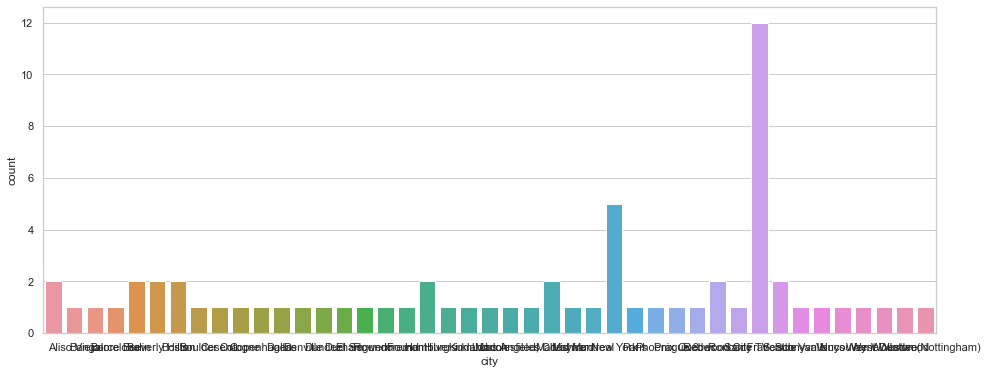

In [126]:
sns.countplot(x=T.city)

In [137]:
T['city'].value_counts()

San Francisco             12
New York                   5
                           2
Madrid                     2
Hamburg                    2
Redwood City               2
Seattle                    2
Boston                     2
Beverly Hills              2
Berlin                     2
Wayne                      1
Vancouver                  1
Van Nuys                   1
Sunnyvale                  1
Roncade TV                 1
Quebec                     1
Prague 8                   1
Phoenix                    1
West Dundee                1
Paris                      1
Westwood                   1
Montreal                   1
Maynard                    1
London                     1
Macclesfiled, Cheshire     1
Denville                   1
Bangalore                  1
Barcelona                  1
Boulder                    1
Cesena                     1
Cologne                    1
Copenhagen                 1
Dallas                     1
Dundee                     1
Los Angeles   

In [131]:
T['city'] = T['city'].str.strip()

In [136]:
T['city'] = T['city'].astype(str)

In [138]:
SF=T[T["city"] =='San Francisco']

In [139]:
SF

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
29,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067
63,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
1,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
2,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
6,Rupture,games_video,25.0,GAMING SOCIAL NETWORK,$3M,San Francisco,USA,37.783898,-122.395234
7,Zynga,games_video,115.0,NETWORK OF GAMING APPLICATIONS,$860M,San Francisco,USA,37.765158,-122.404234
20,Serious Business,games_video,22.0,SOCIAL GAME DEVELOPMENT STUDIO,$4M,San Francisco,USA,37.789321,-122.401362
17,stickychicken,games_video,2.0,PICK-UP GAMES,$0,San Francisco,USA,37.775196,-122.419204
21,Kabam,games_video,650.0,LEADER IN GAMING,$125M,San Francisco,USA,37.394456,-122.078531
27,ngmoco,games_video,150.0,GAMES FOR THE IPHONE,$44.8M,San Francisco,USA,37.770510,-122.401581


In [140]:
T.reset_index(drop=True, inplace=True)

In [141]:
T

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,HashCube,games_video,5.0,SOCIAL GAMING,$0,,IND,12.910491,77.585717
1,Dodreams,games_video,6.0,MMO GAMES,€750k,,FIN,60.165982,24.943857
2,Say Design,games_video,10.0,GAME DESIGN AND INNOVATIONS,$0,Aliso Viejo,USA,33.579204,-117.729338
3,BASH Gaming,games_video,25.0,SOCIAL MOBILE CASINO GAMES,$1M,Bangalore,IND,12.971606,77.594376
4,Tengaged,games_video,1.0,REALITY SOCIAL AND GAMING NETWORK,$15k,Barcelona,ESP,41.424123,2.163425
...,...,...,...,...,...,...,...,...,...
61,Pixelmatic,games_video,10.0,SOCIAL MOBILE GAMES,$0,Vancouver,CAN,49.263588,-123.138565
62,ToonUps,games_video,10.0,UPLIFTING GAMES AND APPS,$0,Wayne,USA,40.046431,-75.393420
63,Crootpad,games_video,2.0,EDUCATIONAL GAMES,$0,West Dundee,USA,42.091078,-88.288749
64,Turbine,games_video,200.0,CREATES AND OPERATES ONLINE GAMES,$76.6M,Westwood,USA,42.214483,-71.185964


In [143]:
SF.reset_index(drop=True, inplace=True)

In [144]:
SF

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067
1,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
2,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
3,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
4,Rupture,games_video,25.0,GAMING SOCIAL NETWORK,$3M,San Francisco,USA,37.783898,-122.395234
5,Zynga,games_video,115.0,NETWORK OF GAMING APPLICATIONS,$860M,San Francisco,USA,37.765158,-122.404234
6,Serious Business,games_video,22.0,SOCIAL GAME DEVELOPMENT STUDIO,$4M,San Francisco,USA,37.789321,-122.401362
7,stickychicken,games_video,2.0,PICK-UP GAMES,$0,San Francisco,USA,37.775196,-122.419204
8,Kabam,games_video,650.0,LEADER IN GAMING,$125M,San Francisco,USA,37.394456,-122.078531
9,ngmoco,games_video,150.0,GAMES FOR THE IPHONE,$44.8M,San Francisco,USA,37.770510,-122.401581


In [145]:
SF['total_money_raised'] = SF['total_money_raised'].str.extract('(.*M|B)')

C:\Users\mataf\AppData\Local\Temp\ipykernel_18660\2401967230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF['total_money_raised'] = SF['total_money_raised'].str.extract('(.*M|B)')


In [146]:
SF

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067
1,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
2,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
3,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
4,Rupture,games_video,25.0,GAMING SOCIAL NETWORK,$3M,San Francisco,USA,37.783898,-122.395234
5,Zynga,games_video,115.0,NETWORK OF GAMING APPLICATIONS,$860M,San Francisco,USA,37.765158,-122.404234
6,Serious Business,games_video,22.0,SOCIAL GAME DEVELOPMENT STUDIO,$4M,San Francisco,USA,37.789321,-122.401362
7,stickychicken,games_video,2.0,PICK-UP GAMES,NaN,San Francisco,USA,37.775196,-122.419204
8,Kabam,games_video,650.0,LEADER IN GAMING,$125M,San Francisco,USA,37.394456,-122.078531
9,ngmoco,games_video,150.0,GAMES FOR THE IPHONE,$44.8M,San Francisco,USA,37.770510,-122.401581


In [150]:
SF=SF.dropna(subset=['total_money_raised'])

In [151]:
SF

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067
1,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
2,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
3,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
4,Rupture,games_video,25.0,GAMING SOCIAL NETWORK,$3M,San Francisco,USA,37.783898,-122.395234
5,Zynga,games_video,115.0,NETWORK OF GAMING APPLICATIONS,$860M,San Francisco,USA,37.765158,-122.404234
6,Serious Business,games_video,22.0,SOCIAL GAME DEVELOPMENT STUDIO,$4M,San Francisco,USA,37.789321,-122.401362
8,Kabam,games_video,650.0,LEADER IN GAMING,$125M,San Francisco,USA,37.394456,-122.078531
9,ngmoco,games_video,150.0,GAMES FOR THE IPHONE,$44.8M,San Francisco,USA,37.770510,-122.401581
10,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067


In [ ]:
data['total_money_raised'] = data['total_money_raised'].str.extract('(.*M|B)')

In [ ]:
#col=col.dropna(subset=['latitude'])

In [ ]:
#columna=Test['offices'].apply(lambda x:x['latitude'])

In [ ]:
#y=json.loads('Offices.json')